# EXPLORATORY DATA ANALISIS UNTUK MENGETAHUI TINGKAT PENGANGGURAN DI JAWA BARAT MENGGUNAKAN DATASET INDEKS PENDIDIKAN, TINGKAT PENGANGGURAN, NILAI INFLASI, GARIS KEMISKINAN, LAJU PERTUMBUHAN PENDUDUK,KEPADATAN PENDUDUK, LOWONGAN KERJA, PENCARI KERJA, UPAH MINIMUM, PENGANGGURAN PENDIDIKAN

#### Tanggal Pembuatan : 01 OKT 2024

#### Tanggal Perbaikan : -

## Kelompok 5
1. Fahmi Rasyid Aflah 2205324
2. Nurainun 2202046
3. Syaila Fathia Azzahra 2206272
4. Tiara Iffatunadia 2317414
5. Wildan Mauli Darojat 2106330

## Pendahuluan
Banyak lulusan baru dan bahkan pekerja berpengalaman harus melakukan pertimbangan matang sebelum memilih tempat bekerja. Setiap daerah di Jawa Barat menawarkan berbagai peluang dan tantangan. Beberapa wilayah mungkin memiliki tingkat upah minimum yang tinggi, tetapi diiringi dengan biaya hidup yang juga tinggi. Sementara itu, daerah lain mungkin menawarkan biaya hidup yang rendah, tetapi dengan peluang pekerjaan yang terbatas.


# Import Libraries dan Dataset



1. bps-od_15045_indeks_pendidikan_berdasarkan_kabupatenkota_data.csv : Berisi data indeks pendidikan berdasarkan kabupaten/kota.
2. bps-od_17044_tingkat_pengangguran_terbuka__kabupatenkota_v3_data.csv : Berisi data tingkat pengangguran terbuka menurut kabupaten/kota.
3. bps-od_17136_nilai_inflasi__kelompok_pengeluaran_2018100_m_to_m_v1_data.csv : Terkait nilai inflasi berdasarkan kelompok pengeluaran.
4. bps-od_20003_garis_kemiskinan_berdasarkan_kabupatenkota_v1_data.csv : Berisi data tentang garis kemiskinan menurut kabupaten/kota.
5. bps-od_20452_laju_prtmbhn_penduduk__kabupatenkota_v3_data.csv : Laju pertumbuhan penduduk di setiap kabupaten/kota.
6. disdukcapil_2-od_17020_kepadatan_penduduk_berdasarkan_kabupatenkota_data.csv : Data kepadatan penduduk per kabupaten/kota.
7. disnakertrans-od_18472_jml_lowongan_kerja_terdaftar__kabupatenkota_v1_data.csv : Jumlah lowongan kerja terdaftar per kabupaten/kota.
8. disnakertrans-od_18486_jml_pencari_kerja_terdaftar__kabupatenkota_v5_data.csv : Jumlah pencari kerja terdaftar per kabupaten/kota.
9. disnakertrans-od_19868_daftar_upah_minimum_kabupatenkota_di_drh_prov_jaba_v1_data.csv : Data upah minimum kabupaten/kota di Provinsi Jawa Barat.
10. disnakertrans-od_19869_jml_pengangguran_terbuka__pendidikan_kabupatenkota_v1_data.csv :Jumlah pengangguran terbuka berdasarkan tingkat pendidikan per kabupaten/kota.

In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import os

sns.set(style="whitegrid")
# !pip install tabulate

indeks_pendidikan = pd.read_csv('bps-od_15045_indeks_pendidikan_berdasarkan_kabupatenkota_data.csv', sep=";")
tingkat_pengangguran = pd.read_csv('bps-od_17044_tingkat_pengangguran_terbuka__kabupatenkota_v3_data.csv', sep=";")
nilai_inflasi = pd.read_csv('bps-od_17136_nilai_inflasi__kelompok_pengeluaran_2018100_m_to_m_v1_data.csv', sep=";")
garis_kemiskinan = pd.read_csv('bps-od_20003_garis_kemiskinan_berdasarkan_kabupatenkota_v1_data.csv', sep=";")
laju_pertumbuhan_penduduk = pd.read_csv('bps-od_20452_laju_prtmbhn_penduduk__kabupatenkota_v3_data.csv', sep=";")
kepadatan_penduduk = pd.read_csv('disdukcapil_2-od_17020_kepadatan_penduduk_berdasarkan_kabupatenkota_data.csv', sep=";")
lowongan_kerja = pd.read_csv('disnakertrans-od_18472_jml_lowongan_kerja_terdaftar__kabupatenkota_v1_data.csv', sep=";")
pencari_kerja = pd.read_csv('disnakertrans-od_18486_jml_pencari_kerja_terdaftar__kabupatenkota_v5_data.csv', sep=";")
upah_minimum = pd.read_csv('disnakertrans-od_19868_daftar_upah_minimum_kabupatenkota_di_drh_prov_jaba_v1_data.csv', sep=";")
pengangguran_pendidikan = pd.read_csv('disnakertrans-od_19869_jml_pengangguran_terbuka__pendidikan_kabupatenkota_v1_data.csv', sep=";")

In [330]:
tahun_filter = (2019, 2022)

indeks_pendidikan = indeks_pendidikan[indeks_pendidikan['tahun'].between(*tahun_filter)]
tingkat_pengangguran = tingkat_pengangguran[tingkat_pengangguran['tahun'].between(*tahun_filter)]
nilai_inflasi = nilai_inflasi[nilai_inflasi['tahun'].between(*tahun_filter)]
garis_kemiskinan = garis_kemiskinan[garis_kemiskinan['tahun'].between(*tahun_filter)]
laju_pertumbuhan_penduduk = laju_pertumbuhan_penduduk[laju_pertumbuhan_penduduk['tahun'].between(*tahun_filter)]
kepadatan_penduduk = kepadatan_penduduk[kepadatan_penduduk['tahun'].between(*tahun_filter)]
lowongan_kerja = lowongan_kerja[lowongan_kerja['tahun'].between(*tahun_filter)]
pencari_kerja = pencari_kerja[pencari_kerja['tahun'].between(*tahun_filter)]
upah_minimum = upah_minimum[upah_minimum['tahun'].between(*tahun_filter)]
pengangguran_pendidikan = pengangguran_pendidikan[pengangguran_pendidikan['tahun'].between(*tahun_filter)]

### Eksplorasi data indeks_pendidikan

In [331]:
indeks_pendidikan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   108 non-null    int64 
 1   kode_provinsi        108 non-null    int64 
 2   nama_provinsi        108 non-null    object
 3   kode_kabupaten_kota  108 non-null    int64 
 4   nama_kabupaten_kota  108 non-null    object
 5   indeks_pendidikan    108 non-null    object
 6   satuan               108 non-null    object
 7   tahun                108 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.9+ KB


In [332]:
indeks_pendidikan = indeks_pendidikan.drop(columns = ["kode_provinsi", "nama_provinsi","kode_kabupaten_kota","satuan"])


indeks_pendidikan.head()

,id,nama_kabupaten_kota,indeks_pendidikan,tahun
0,241,KABUPATEN BOGOR,"62,27",2019
1,242,KABUPATEN SUKABUMI,"57,34",2019
2,243,KABUPATEN CIANJUR,"56,51",2019
3,244,KABUPATEN BANDUNG,"64,52",2019
4,245,KABUPATEN GARUT,"57,87",2019


In [333]:
# Mengonversi tanda koma menjadi titik dan mengubah tipe data menjadi numerik
indeks_pendidikan['indeks_pendidikan'] = indeks_pendidikan['indeks_pendidikan'].str.replace(',', '.')
indeks_pendidikan['indeks_pendidikan'] = pd.to_numeric(indeks_pendidikan['indeks_pendidikan'], errors='coerce')

# Mengurutkan berdasarkan kolom 'indeks_pendidikan' dari kecil ke besar
mean_indeks_pendidikan_sorted = indeks_pendidikan.sort_values(by='indeks_pendidikan', ascending=True)

# Mencari nilai mean dari kolom 'indeks_pendidikan'
mean_indeks_pendidikan = mean_indeks_pendidikan_sorted['indeks_pendidikan'].mean()

# Menampilkan hasil
print(mean_indeks_pendidikan)

64.23240740740741


1. Daerah perkotaan di Jawa Barat tampaknya memiliki indeks pendidikan yang lebih baik, yang mungkin disebabkan oleh konsentrasi fasilitas pendidikan yang lebih banyak, akses yang lebih mudah, dan pendanaan yang lebih besar untuk pendidikan di kota.
2. Kabupaten-kabupaten di pedesaan seperti Kabupaten Cianjur dan Kabupaten Indramayu memiliki indeks pendidikan yang relatif rendah.

### Eksplorasi data tingkat_pengangguran

In [334]:
tingkat_pengangguran.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 0 to 107
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            108 non-null    int64 
 1   kode_provinsi                 108 non-null    int64 
 2   nama_provinsi                 108 non-null    object
 3   kode_kabupaten_kota           108 non-null    int64 
 4   nama_kabupaten_kota           108 non-null    object
 5   tingkat_pengangguran_terbuka  108 non-null    object
 6   satuan                        108 non-null    object
 7   tahun                         108 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 7.6+ KB


In [335]:
tingkat_pengangguran = tingkat_pengangguran.drop(columns = ["kode_provinsi", "nama_provinsi","kode_kabupaten_kota","satuan"])

In [336]:
tingkat_pengangguran.head()

,id,nama_kabupaten_kota,tingkat_pengangguran_terbuka,tahun
0,263,KABUPATEN BOGOR,"9,11",2019
1,264,KABUPATEN SUKABUMI,"8,05",2019
2,265,KABUPATEN CIANJUR,"9,81",2019
3,266,KABUPATEN BANDUNG,"5,51",2019
4,267,KABUPATEN GARUT,"7,35",2019


In [337]:
# Mengurutkan berdasarkan kolom 'tingkat_pengangguran_terbuka' dari kecil ke besar
mean_tingkat_pengangguran_sorted = tingkat_pengangguran.sort_values(by='tingkat_pengangguran_terbuka', ascending=True)

# Menampilkan hasil
print(mean_tingkat_pengangguran_sorted)

     id    nama_kabupaten_kota tingkat_pengangguran_terbuka  tahun
98  361  KABUPATEN PANGANDARAN                         1,56   2022
69  332       KABUPATEN BEKASI                        10,09   2021
96  359       KABUPATEN BEKASI                        10,31   2022
8   271      KABUPATEN CIREBON                        10,35   2019
62  325      KABUPATEN CIREBON                        10,38   2021
..  ...                    ...                          ...    ...
2   265      KABUPATEN CIANJUR                         9,81   2019
88  351     KABUPATEN KUNINGAN                         9,81   2022
95  358     KABUPATEN KARAWANG                         9,87   2022
50  313             KOTA DEPOK                         9,87   2020
37  300     KABUPATEN SUMEDANG                         9,89   2020

[108 rows x 4 columns]


1. Data yang menarik karena kota-kota besar di jawa barat memiliki tingkat pengangguran yang lebih besar dibandingkan daerah pangandara atau ciamis. Kota-kota besar seperti Bandung, Bogor, dan Bekasi memiliki tingkat pengangguran yang lebih tinggi dibandingkan beberapa kabupaten dengan ekonomi yang lebih agraris seperti Pangandaran dan Ciamis.
2. Urbanisasi yang tidak seimbang antara penciptaan lapangan kerja dan migrasi tenaga kerja dapat menjadi faktor utama ketimpangan tersebut.

### Eksplorasi data nilai_inflasi

In [338]:
nilai_inflasi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3455
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    3456 non-null   int64 
 1   kode_provinsi         3456 non-null   int64 
 2   nama_provinsi         3456 non-null   object
 3   kode_kabupaten_kota   3456 non-null   object
 4   nama_kabupaten_kota   3456 non-null   object
 5   kelompok_pengeluaran  3456 non-null   object
 6   kode_bulan            3456 non-null   int64 
 7   bulan_pengeluaran     3456 non-null   object
 8   nilai_inflasi         3456 non-null   object
 9   satuan                3456 non-null   object
 10  tahun                 3456 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 324.0+ KB


In [339]:
nilai_inflasi = nilai_inflasi.drop(columns = ["kode_provinsi", "nama_provinsi","kode_kabupaten_kota","satuan","kode_bulan"])

In [340]:
nilai_inflasi.head()

,id,nama_kabupaten_kota,kelompok_pengeluaran,bulan_pengeluaran,nilai_inflasi,tahun
0,1,KOTA BOGOR,UMUM,JANUARI,"0,78",2020
1,2,KOTA BOGOR,"MAKANAN, MINUMAN DAN TEMBAKAU",JANUARI,"2,49",2020
2,3,KOTA BOGOR,PAKAIAN DAN ALAS KAKI,JANUARI,"0,22",2020
3,4,KOTA BOGOR,"PERUMAHAN, AIR, LISTRIK DAN BAHAN BAKAR RUMAH ...",JANUARI,"0,03",2020
4,5,KOTA BOGOR,"PERLENGKAPAN, PERALATAN DAN PEMELIHARAAN RUTIN...",JANUARI,"0,3",2020


In [341]:
# Mengurutkan berdasarkan kolom 'nilai_inflasi' dari kecil ke besar
mean_nilai_inflasi_sorted = nilai_inflasi.sort_values(by='nilai_inflasi', ascending=True)

# Menampilkan hasil
print(mean_nilai_inflasi_sorted)

        id nama_kabupaten_kota  \
99     100          KOTA BOGOR   
1123  1124     GABUNGAN 7 KOTA   
72      73          KOTA BOGOR   
2215  2216     GABUNGAN 7 KOTA   
1604  1605        KOTA CIREBON   
...    ...                 ...   
881    882    KOTA TASIKMALAYA   
2727  2728        KOTA BANDUNG   
3126  3127          KOTA DEPOK   
2982  2983         KOTA BEKASI   
3414  3415     GABUNGAN 7 KOTA   

                                   kelompok_pengeluaran bulan_pengeluaran  \
99    PERUMAHAN, AIR, LISTRIK DAN BAHAN BAKAR RUMAH ...         SEPTEMBER   
1123            INFORMASI, KOMUNIKASI DAN JASA KEUANGAN           OKTOBER   
72                                                 UMUM              JULI   
2215            INFORMASI, KOMUNIKASI DAN JASA KEUANGAN               MEI   
1604                      REKREASI, OLAHRAGA DAN BUDAYA          FEBRUARI   
...                                                 ...               ...   
881                                           KESEHA

1. Nilai inflasi Gabungan 7 Kota adalah 22.00%, yang merupakan nilai rata-rata dari beberapa kota besar. Ini menunjukkan gambaran umum inflasi di kawasan perkotaan Jawa Barat secara keseluruhan.
2. Inflasi yang tinggi di kota-kota besar mungkin menunjukkan adanya tekanan harga di sektor konsumsi, yang dapat berdampak pada daya beli masyarakat dan stabilitas ekonomi lokal.

### Eksplorasi data garis_kemiskinan

In [342]:
garis_kemiskinan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 0 to 107
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   108 non-null    int64 
 1   kode_provinsi        108 non-null    int64 
 2   nama_provinsi        108 non-null    object
 3   kode_kabupaten_kota  108 non-null    int64 
 4   nama_kabupaten_kota  108 non-null    object
 5   garis_kemiskinan     108 non-null    int64 
 6   satuan               108 non-null    object
 7   tahun                108 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 7.6+ KB


In [343]:
garis_kemiskinan = garis_kemiskinan.drop(columns = ["kode_provinsi", "nama_provinsi","kode_kabupaten_kota","satuan"])

garis_kemiskinan.head()

,id,nama_kabupaten_kota,garis_kemiskinan,tahun
0,406,KABUPATEN BOGOR,373799,2019
1,407,KABUPATEN SUKABUMI,309676,2019
2,408,KABUPATEN CIANJUR,350760,2019
3,409,KABUPATEN BANDUNG,345177,2019
4,410,KABUPATEN GARUT,301202,2019


In [344]:
# Mengurutkan berdasarkan kolom 'garis_kemiskinan' dari kecil ke besar
mean_garis_kemiskinan_sorted = garis_kemiskinan.sort_values(by='garis_kemiskinan', ascending=True)

mean_garis_kemiskinan = mean_garis_kemiskinan_sorted['garis_kemiskinan'].mean()

# Menampilkan hasil
print(mean_garis_kemiskinan)

440597.9074074074


### Eksplorasi data laju_pertumbuhan_penduduk

In [345]:
laju_pertumbuhan_penduduk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 0 to 107
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         108 non-null    int64 
 1   kode_provinsi              108 non-null    int64 
 2   nama_provinsi              108 non-null    object
 3   kode_kabupaten_kota        108 non-null    int64 
 4   nama_kabupaten_kota        108 non-null    object
 5   laju_pertumbuhan_penduduk  108 non-null    object
 6   satuan                     108 non-null    object
 7   tahun                      108 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 7.6+ KB


In [346]:
laju_pertumbuhan_penduduk = laju_pertumbuhan_penduduk.drop(columns = ["kode_provinsi", "nama_provinsi","kode_kabupaten_kota","satuan"])

In [347]:
laju_pertumbuhan_penduduk.head()

,id,nama_kabupaten_kota,laju_pertumbuhan_penduduk,tahun
0,55,KABUPATEN BOGOR,"2,41",2019
1,56,KABUPATEN SUKABUMI,"0,5",2019
2,57,KABUPATEN CIANJUR,"0,38",2019
3,58,KABUPATEN BANDUNG,"1,84",2019
4,59,KABUPATEN GARUT,"0,89",2019


In [348]:
laju_pertumbuhan_penduduk['laju_pertumbuhan_penduduk'] = laju_pertumbuhan_penduduk['laju_pertumbuhan_penduduk'].str.replace(',', '.')
laju_pertumbuhan_penduduk['laju_pertumbuhan_penduduk'] = pd.to_numeric(laju_pertumbuhan_penduduk['laju_pertumbuhan_penduduk'], errors='coerce')

mean_laju_pertumbuhan_penduduk_sorted = laju_pertumbuhan_penduduk.sort_values(by='laju_pertumbuhan_penduduk', ascending=True)

mean_laju_pertumbuhan_penduduk = mean_laju_pertumbuhan_penduduk_sorted['laju_pertumbuhan_penduduk'].mean()

# Menampilkan hasil pengurutan dan rata-rata
print("Rata-rata laju pertumbuhan penduduk:", mean_laju_pertumbuhan_penduduk)


Rata-rata laju pertumbuhan penduduk: 1.233611111111111


### Eksplorasi data kepadatan_penduduk

In [349]:
kepadatan_penduduk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 0 to 107
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   108 non-null    int64 
 1   kode_provinsi        108 non-null    int64 
 2   nama_provinsi        108 non-null    object
 3   kode_kabupaten_kota  108 non-null    int64 
 4   nama_kabupaten_kota  108 non-null    object
 5   kepadatan_penduduk   108 non-null    int64 
 6   satuan               108 non-null    object
 7   tahun                108 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 7.6+ KB


In [350]:
kepadatan_penduduk = kepadatan_penduduk.drop(columns = ["kode_provinsi", "nama_provinsi","kode_kabupaten_kota","satuan"])

In [351]:
kepadatan_penduduk.head()

,id,nama_kabupaten_kota,kepadatan_penduduk,tahun
0,163,KABUPATEN BOGOR,1740,2019
1,164,KABUPATEN SUKABUMI,620,2019
2,165,KABUPATEN CIANJUR,597,2019
3,166,KABUPATEN BANDUNG,2015,2019
4,167,KABUPATEN GARUT,743,2019


In [352]:
mean_kepadatan_penduduk_sorted = kepadatan_penduduk.sort_values(by='kepadatan_penduduk', ascending=True)

mean_kepadatan_penduduk = mean_kepadatan_penduduk_sorted['kepadatan_penduduk'].mean()

# Menampilkan hasil pengurutan dan rata-rata
print("Rata-rata kepadatan penduduk:", mean_kepadatan_penduduk)


Rata-rata kepadatan penduduk: 3814.824074074074


### Eksplorasi data lowongan_kerja

In [353]:
lowongan_kerja.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 27 to 134
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     108 non-null    int64 
 1   kode_provinsi          108 non-null    int64 
 2   nama_provinsi          108 non-null    object
 3   kode_kabupaten_kota    108 non-null    int64 
 4   nama_kabupaten_kota    108 non-null    object
 5   jumlah_lowongan_kerja  108 non-null    int64 
 6   satuan                 108 non-null    object
 7   tahun                  108 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 7.6+ KB


In [354]:
lowongan_kerja = lowongan_kerja.drop(columns = ["kode_provinsi", "nama_provinsi","kode_kabupaten_kota"])

In [355]:
lowongan_kerja.head()

,id,nama_kabupaten_kota,jumlah_lowongan_kerja,satuan,tahun
27,28,KABUPATEN BOGOR,22,LOWONGAN KERJA,2019
28,29,KABUPATEN SUKABUMI,1805,LOWONGAN KERJA,2019
29,30,KABUPATEN CIANJUR,2,LOWONGAN KERJA,2019
30,31,KABUPATEN BANDUNG,69,LOWONGAN KERJA,2019
31,32,KABUPATEN GARUT,0,LOWONGAN KERJA,2019


In [356]:
mean_lowongan_kerja_sorted = lowongan_kerja.sort_values(by='jumlah_lowongan_kerja', ascending=True)

mean_lowongan_kerja = mean_lowongan_kerja_sorted['jumlah_lowongan_kerja'].mean()

# Menampilkan hasil pengurutan dan rata-rata
print("Rata-rata lowongan kerja:", mean_lowongan_kerja)

Rata-rata lowongan kerja: 3030.453703703704


### Eksplorasi data pencari_kerja

In [357]:
pencari_kerja.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 27 to 134
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    108 non-null    int64 
 1   kode_provinsi         108 non-null    int64 
 2   nama_provinsi         108 non-null    object
 3   kode_kabupaten_kota   108 non-null    int64 
 4   nama_kabupaten_kota   108 non-null    object
 5   jumlah_pencari_kerja  108 non-null    int64 
 6   satuan                108 non-null    object
 7   tahun                 108 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 7.6+ KB


In [358]:
pencari_kerja = pencari_kerja.drop(columns = ["kode_provinsi", "nama_provinsi","kode_kabupaten_kota","satuan"])

In [359]:
pencari_kerja.head()

,id,nama_kabupaten_kota,jumlah_pencari_kerja,tahun
27,28,KABUPATEN BOGOR,4909,2019
28,29,KABUPATEN SUKABUMI,46812,2019
29,30,KABUPATEN CIANJUR,812,2019
30,31,KABUPATEN BANDUNG,5327,2019
31,32,KABUPATEN GARUT,928,2019


In [360]:
mean_pencari_kerja_sorted = pencari_kerja.sort_values(by='jumlah_pencari_kerja', ascending=True)

mean_pencari_kerja = mean_pencari_kerja_sorted['jumlah_pencari_kerja'].mean()

# Menampilkan hasil pengurutan dan rata-rata
print("Rata-rata pencari kerja:", mean_pencari_kerja)

Rata-rata pencari kerja: 12263.083333333334


### Eksplorasi data upah_minimum

In [361]:
upah_minimum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 54 to 161
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    108 non-null    int64 
 1   kode_provinsi         108 non-null    int64 
 2   nama_provinsi         108 non-null    object
 3   kode_kabupaten_kota   108 non-null    int64 
 4   nama_kabupaten_kota   108 non-null    object
 5   besaran_upah_minimum  108 non-null    object
 6   satuan                108 non-null    object
 7   tahun                 108 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 7.6+ KB


In [362]:
upah_minimum = upah_minimum.drop(columns = ["kode_provinsi", "nama_provinsi","kode_kabupaten_kota","satuan"])

In [363]:
upah_minimum.head()

,id,nama_kabupaten_kota,besaran_upah_minimum,tahun
54,55,KABUPATEN BOGOR,"3763405,88",2019
55,56,KABUPATEN SUKABUMI,"2791016,23",2019
56,57,KABUPATEN CIANJUR,"2336004,97",2019
57,58,KABUPATEN BANDUNG,"2893074,71",2019
58,59,KABUPATEN GARUT,"1807285,69",2019


In [364]:
upah_minimum['besaran_upah_minimum'] = upah_minimum['besaran_upah_minimum'].str.replace(',', '.')
upah_minimum['besaran_upah_minimum'] = pd.to_numeric(upah_minimum['besaran_upah_minimum'], errors='coerce')

mean_upah_minimum_sorted = upah_minimum.sort_values(by='besaran_upah_minimum', ascending=True)

mean_upah_minimum = mean_upah_minimum_sorted['besaran_upah_minimum'].mean()

# Menampilkan hasil pengurutan dan rata-rata
print("Rata-rata upah minimum:", mean_upah_minimum)

Rata-rata upah minimum: 2951872.186018518


### Eksplorasi data pengangguran_pendidikan

In [365]:
pengangguran_pendidikan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 0 to 539
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   540 non-null    int64  
 1   kode_provinsi        540 non-null    int64  
 2   nama_provinsi        540 non-null    object 
 3   kode_kabupaten_kota  540 non-null    int64  
 4   nama_kabupaten_kota  540 non-null    object 
 5   pendidikan           540 non-null    object 
 6   jumlah_pengangguran  540 non-null    float64
 7   satuan               540 non-null    object 
 8   tahun                540 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 42.2+ KB


In [366]:
pengangguran_pendidikan = pengangguran_pendidikan.drop(columns = ["kode_provinsi", "nama_provinsi","kode_kabupaten_kota","satuan"])

In [367]:
pengangguran_pendidikan.head()

,id,nama_kabupaten_kota,pendidikan,jumlah_pengangguran,tahun
0,892,KABUPATEN BOGOR,SD KE BAWAH,64836.0,2019
1,893,KABUPATEN BOGOR,SMP,36554.0,2019
2,894,KABUPATEN BOGOR,SMA,129723.0,2019
3,895,KABUPATEN BOGOR,DIPLOMA I/II/III/AKADEMI/UNIVERSITAS,21901.0,2019
4,896,KABUPATEN SUKABUMI,SD KE BAWAH,22553.0,2019


In [368]:

mean_pengangguran_pendidikan_sorted = pengangguran_pendidikan.sort_values(by='jumlah_pengangguran', ascending=True)

mean_pengangguran_pendidikan = mean_pengangguran_pendidikan_sorted['jumlah_pengangguran'].mean()

# Menampilkan hasil pengurutan dan rata-rata
print("Rata-rata pengangguran pendidikan:", mean_upah_minimum)

Rata-rata pengangguran pendidikan: 2951872.186018518


### Mengetahui apakah ada nilai null di semua tabel

In [369]:
datasets = {
    "indeks_pendidikan": indeks_pendidikan,
    "tingkat_pengangguran": tingkat_pengangguran,
    "nilai_inflasi": nilai_inflasi,
    "garis_kemiskinan": garis_kemiskinan,
    "laju_pertumbuhan_penduduk": laju_pertumbuhan_penduduk,
    "kepadatan_penduduk": kepadatan_penduduk,
    "lowongan_kerja": lowongan_kerja,
    "pencari_kerja": pencari_kerja,
    "upah_minimum": upah_minimum,
    "pengangguran_pendidikan": pengangguran_pendidikan
}

# mengecek apakah ada nilai null di setiap dataset
for name, df in datasets.items():
    print(f"Dataset {name} - Jumlah nilai null di setiap kolom:")
    print(df.isnull().sum())
    print("\n")

Dataset indeks_pendidikan - Jumlah nilai null di setiap kolom:
id                     0
nama_kabupaten_kota    0
indeks_pendidikan      0
tahun                  0
dtype: int64


Dataset tingkat_pengangguran - Jumlah nilai null di setiap kolom:
id                              0
nama_kabupaten_kota             0
tingkat_pengangguran_terbuka    0
tahun                           0
dtype: int64


Dataset nilai_inflasi - Jumlah nilai null di setiap kolom:
id                      0
nama_kabupaten_kota     0
kelompok_pengeluaran    0
bulan_pengeluaran       0
nilai_inflasi           0
tahun                   0
dtype: int64


Dataset garis_kemiskinan - Jumlah nilai null di setiap kolom:
id                     0
nama_kabupaten_kota    0
garis_kemiskinan       0
tahun                  0
dtype: int64


Dataset laju_pertumbuhan_penduduk - Jumlah nilai null di setiap kolom:
id                           0
nama_kabupaten_kota          0
laju_pertumbuhan_penduduk    0
tahun                        0
dty

In [370]:
# Cek dan konversi kolom yang sudah numerik, gunakan str.replace() hanya untuk kolom string
indeks_pendidikan['indeks_pendidikan'] = pd.to_numeric(indeks_pendidikan['indeks_pendidikan'].astype(str).str.replace(',', ''), errors='coerce')
tingkat_pengangguran['tingkat_pengangguran_terbuka'] = pd.to_numeric(tingkat_pengangguran['tingkat_pengangguran_terbuka'].astype(str).str.replace(',', ''), errors='coerce')
nilai_inflasi['nilai_inflasi'] = pd.to_numeric(nilai_inflasi['nilai_inflasi'].astype(str).str.replace(',', ''), errors='coerce')
garis_kemiskinan['garis_kemiskinan'] = pd.to_numeric(garis_kemiskinan['garis_kemiskinan'], errors='coerce')  # Tidak perlu str.replace jika sudah numerik
laju_pertumbuhan_penduduk['laju_pertumbuhan_penduduk'] = pd.to_numeric(laju_pertumbuhan_penduduk['laju_pertumbuhan_penduduk'], errors='coerce')  # Sama, langsung konversi
kepadatan_penduduk['kepadatan_penduduk'] = pd.to_numeric(kepadatan_penduduk['kepadatan_penduduk'], errors='coerce')
lowongan_kerja['jumlah_lowongan_kerja'] = pd.to_numeric(lowongan_kerja['jumlah_lowongan_kerja'].astype(str).str.replace(',', ''), errors='coerce')
pencari_kerja['jumlah_pencari_kerja'] = pd.to_numeric(pencari_kerja['jumlah_pencari_kerja'].astype(str).str.replace(',', ''), errors='coerce')
upah_minimum['besaran_upah_minimum'] = pd.to_numeric(upah_minimum['besaran_upah_minimum'].astype(str).str.replace(',', ''), errors='coerce')
pengangguran_pendidikan['jumlah_pengangguran'] = pd.to_numeric(pengangguran_pendidikan['jumlah_pengangguran'].astype(str).str.replace(',', ''), errors='coerce')

In [371]:
mean_indeks_pendidikan = indeks_pendidikan.groupby('nama_kabupaten_kota')['indeks_pendidikan'].mean().to_frame()
mean_tingkat_pengangguran = tingkat_pengangguran.groupby('nama_kabupaten_kota')['tingkat_pengangguran_terbuka'].mean().to_frame()
mean_nilai_inflasi = nilai_inflasi.groupby('nama_kabupaten_kota')['nilai_inflasi'].mean().to_frame()
mean_garis_kemiskinan = garis_kemiskinan.groupby('nama_kabupaten_kota')['garis_kemiskinan'].mean().to_frame()
mean_laju_pertumbuhan_penduduk = laju_pertumbuhan_penduduk.groupby('nama_kabupaten_kota')['laju_pertumbuhan_penduduk'].mean().to_frame()
mean_kepadatan_penduduk = kepadatan_penduduk.groupby('nama_kabupaten_kota')['kepadatan_penduduk'].mean().to_frame()
mean_lowongan_kerja = lowongan_kerja.groupby('nama_kabupaten_kota')['jumlah_lowongan_kerja'].mean().to_frame()
mean_pencari_kerja = pencari_kerja.groupby('nama_kabupaten_kota')['jumlah_pencari_kerja'].mean().to_frame()
mean_upah_minimum = upah_minimum.groupby('nama_kabupaten_kota')['besaran_upah_minimum'].mean().to_frame()
mean_pengangguran_pendidikan = pengangguran_pendidikan.groupby('nama_kabupaten_kota')['jumlah_pengangguran'].mean().to_frame()

In [372]:
# Mulai gabung dengan outer join
df1 = pd.merge(mean_indeks_pendidikan, mean_tingkat_pengangguran, how='outer', on='nama_kabupaten_kota')
df2 = pd.merge(df1, mean_nilai_inflasi, how='outer', on='nama_kabupaten_kota')
df3 = pd.merge(df2, mean_garis_kemiskinan, how='outer', on='nama_kabupaten_kota')
df4 = pd.merge(df3, mean_laju_pertumbuhan_penduduk, how='outer', on='nama_kabupaten_kota')
df5 = pd.merge(df4, mean_kepadatan_penduduk, how='outer', on='nama_kabupaten_kota')
df6 = pd.merge(df5, mean_lowongan_kerja, how='outer', on='nama_kabupaten_kota')
df7 = pd.merge(df6, mean_pencari_kerja, how='outer', on='nama_kabupaten_kota')
df8 = pd.merge(df7, mean_upah_minimum, how='outer', on='nama_kabupaten_kota')
df9 = pd.merge(df8, mean_pengangguran_pendidikan, how='outer', on='nama_kabupaten_kota')

# Mengurutkan hasil berdasarkan 'indeks_pendidikan'
df9_sorted = df9.sort_values(by='indeks_pendidikan', ascending=False)

# Menampilkan hasil
df9_sorted.head(26)  # atau gunakan pd.set_option untuk menampilkan semua

,indeks_pendidikan,tingkat_pengangguran_terbuka,nilai_inflasi,garis_kemiskinan,laju_pertumbuhan_penduduk,kepadatan_penduduk,jumlah_lowongan_kerja,jumlah_pencari_kerja,besaran_upah_minimum,jumlah_pengangguran
nama_kabupaten_kota,,,,,,,,,,
KOTA BEKASI,76.5375,780.00,23.388889,674987.00,1.4325,11849.75,5248.75,10908.75,4.604831e+06,29686.05
KOTA DEPOK,76.3575,839.25,19.231481,695727.25,2.2450,9421.00,1679.00,3109.50,4.197851e+06,20329.95
KOTA BANDUNG,75.7000,1009.50,22.430556,508992.75,0.3800,15015.75,5799.25,7251.75,3.620124e+06,27137.55
KOTA CIMAHI,75.1825,831.50,NaN,516977.50,0.8150,13984.75,991.50,1424.00,3.136737e+06,6787.20
KOTA BOGOR,72.1050,1110.25,23.432870,560279.00,1.2225,9261.25,1278.00,4033.25,4.128162e+06,11813.15
KOTA SUKABUMI,70.1675,1006.75,18.722222,557502.25,1.4500,7318.25,1216.00,4452.25,2.488638e+06,2979.40
KOTA CIREBON,70.0100,974.00,20.939815,463847.25,1.2175,9067.25,925.00,1835.50,2.210264e+06,3051.25
KOTA TASIKMALAYA,68.6325,726.25,21.539352,476775.25,1.0950,4186.50,466.50,5131.50,2.244526e+06,4922.35
KABUPATEN BEKASI,67.0325,800.75,NaN,532373.75,2.3450,2379.75,3380.75,22005.50,4.557194e+06,38768.95


In [373]:
# catatan
# 1. data nilai_inflasi gak lengkap, cuma nampilin 7 kota doang jadi sisanya NaN
# 2. data laju_pertumbuhan penduduk semuanya NaN, padahal kalo cek di dataset ada nilainya
# 3. lanjut ke anlisis visualisasi


# visualisasi dan analisis

Histogram untuk Distribusi Kepadatan Penduduk

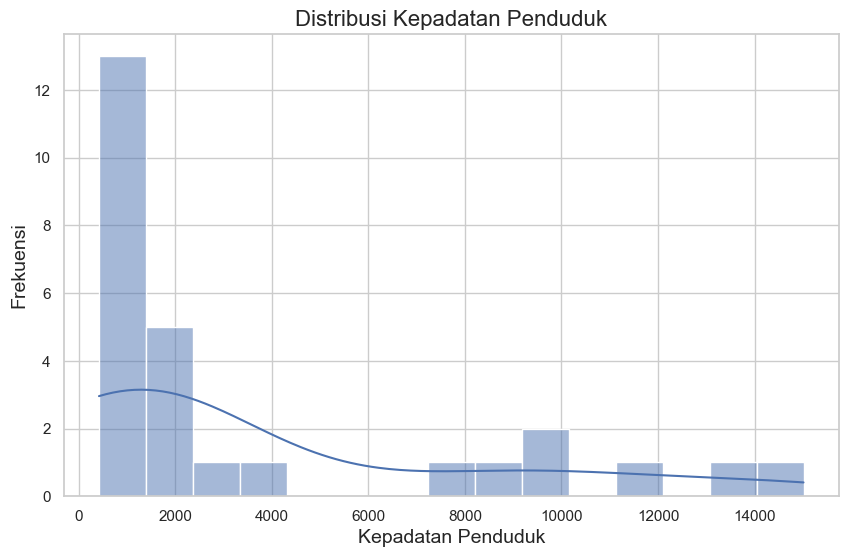

In [374]:
plt.figure(figsize=(10, 6))
sns.histplot(df9_sorted['kepadatan_penduduk'], bins=15, kde=True)
plt.title('Distribusi Kepadatan Penduduk', fontsize=16)
plt.xlabel('Kepadatan Penduduk', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.show()


Scatter Plot untuk Melihat Hubungan antara Kepadatan Penduduk dan Pengangguran

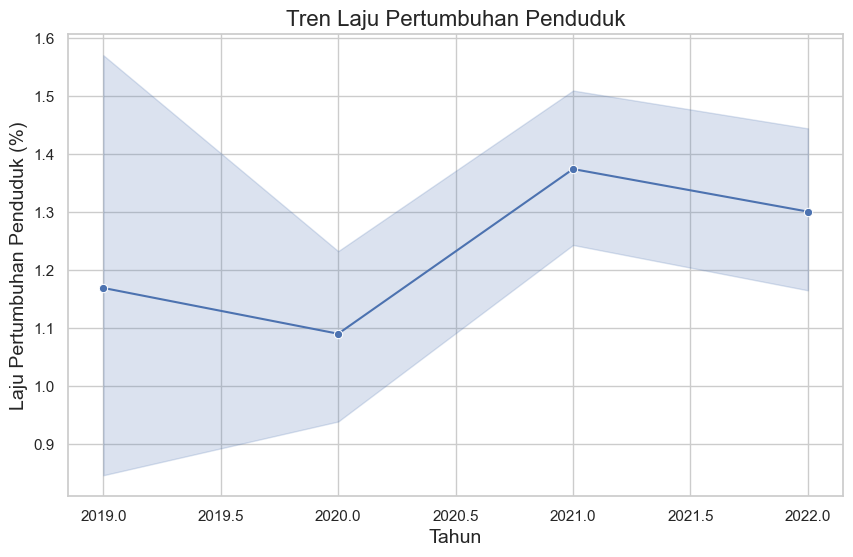

In [375]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_laju_pertumbuhan_penduduk_sorted, x='tahun', y='laju_pertumbuhan_penduduk', marker='o')
plt.title('Tren Laju Pertumbuhan Penduduk', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Laju Pertumbuhan Penduduk (%)', fontsize=14)
plt.show()

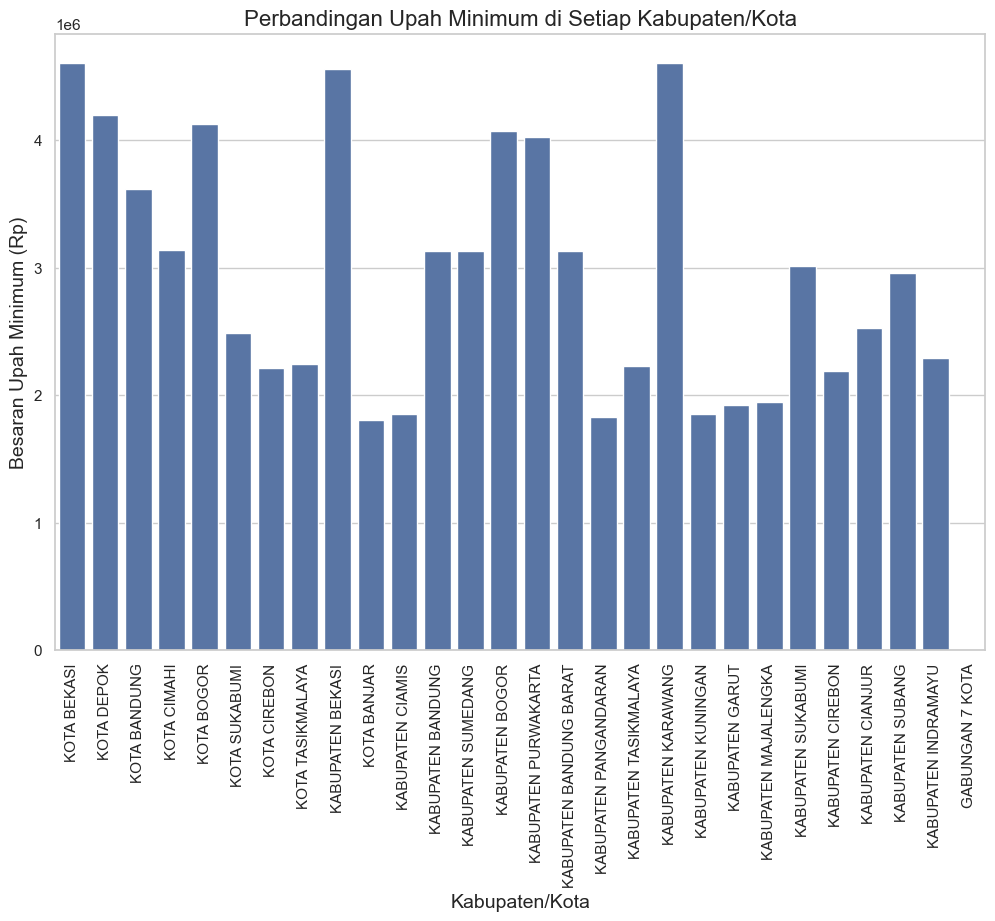

In [376]:
# Membuat bar plot untuk membandingkan upah minimum di setiap kabupaten/kota
plt.figure(figsize=(12, 8))
sns.barplot(x='nama_kabupaten_kota', y='besaran_upah_minimum', data=df9_sorted)
plt.xticks(rotation=90)
plt.title('Perbandingan Upah Minimum di Setiap Kabupaten/Kota', fontsize=16)
plt.xlabel('Kabupaten/Kota', fontsize=14)
plt.ylabel('Besaran Upah Minimum (Rp)', fontsize=14)
plt.show()

Heatmap Korelasi Antar Variabel

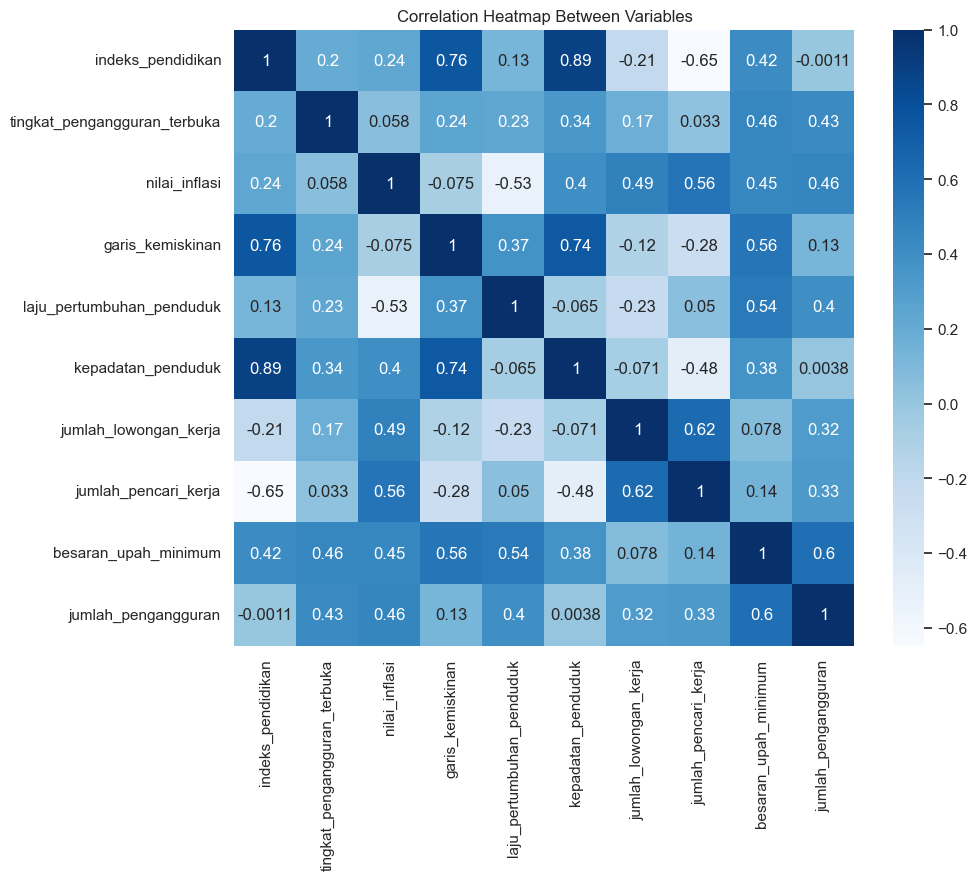

In [377]:
plt.figure(figsize=(10, 8))
sns.heatmap(df9_sorted.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlation Heatmap Between Variables')
plt.show()

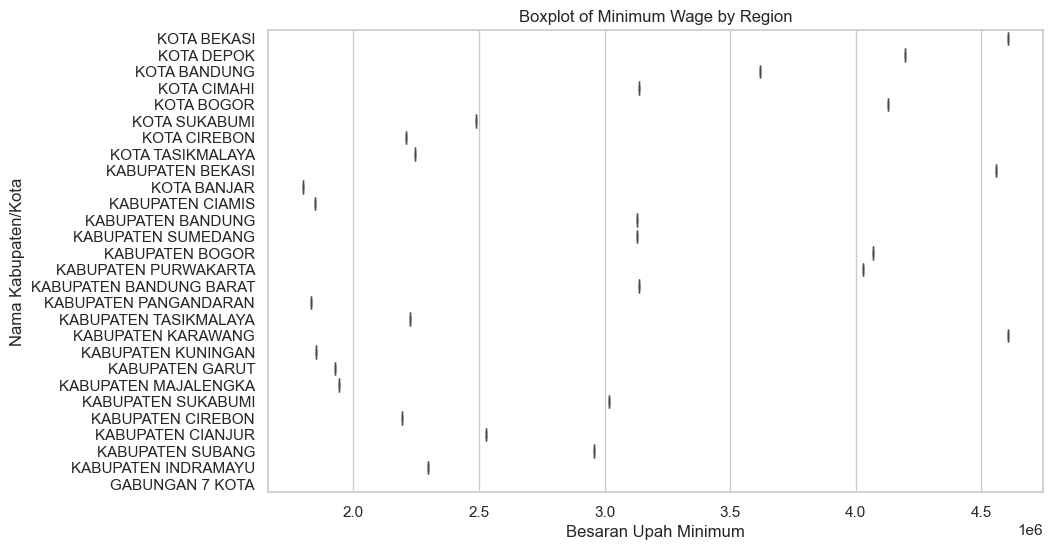

In [378]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='besaran_upah_minimum', y='nama_kabupaten_kota', data=df9_sorted)
plt.title('Boxplot of Minimum Wage by Region')
plt.xlabel('Besaran Upah Minimum')
plt.ylabel('Nama Kabupaten/Kota')
plt.show()

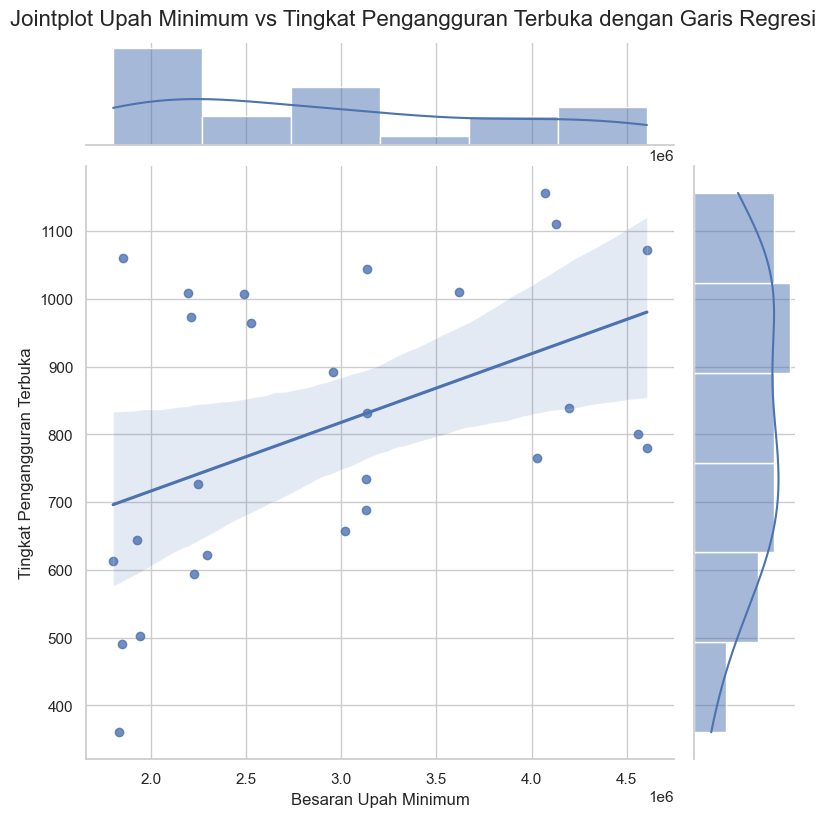

In [379]:
# Jointplot untuk melihat hubungan antara besaran upah minimum dan tingkat pengangguran terbuka
sns.jointplot(x='besaran_upah_minimum', y='tingkat_pengangguran_terbuka', data=df9_sorted, kind='reg', height=8)

plt.suptitle('Jointplot Upah Minimum vs Tingkat Pengangguran Terbuka dengan Garis Regresi', y=1.02, fontsize=16)
plt.xlabel('Besaran Upah Minimum')
plt.ylabel('Tingkat Pengangguran Terbuka')
plt.show()